# 学習方法の例

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.layers import TwoLayerNet
from sklearn.model_selection import train_test_split
import pickle

## データを読む1

In [10]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [11]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
print(train_data)

[[[[0.99607843 0.99607843 0.99607843 ... 1.         1.
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.6901961  1.
    1.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.2627451 ]
   [0.99607843 0.99607843 0.99607843 ... 0.9490196  1.
    1.        ]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]

In [12]:
# 配列形式変更
train_data = train_data.reshape(-1, 28*28)
print("train_data.shape=", train_data.shape)

train_data.shape= (3000, 784)


## trainとtestに分割する

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, 
                                                                                        test_size=0.3, random_state=1234,
                                                                                        shuffle=True
                                                                                       )

print(X_train.shape, X_test.shape)

(2100, 784) (900, 784)


## 学習

In [14]:
epochs = 10
batch_size = 32
lr = 0.01

# 繰り返し回数
xsize = X_train.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=28*28, hidden_size=10, output_size=15)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_ = X_train[mask]
        y_ = y_train[mask]
        
        # 勾配の計算
        grads = tnet.gradient(x_, y_)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    ## 学習経過の記録
    
    # 訓練データにおけるloss
    train_loss.append(tnet.loss(X_train,  y_train))
    
    # テストデータにおけるloss
    test_loss.append(tnet.loss(X_test, y_test))
    
    # 訓練データにて精度を確認
    train_accuracy.append(tnet.accuracy(X_train, y_train))

    # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy(X_test, y_test))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9


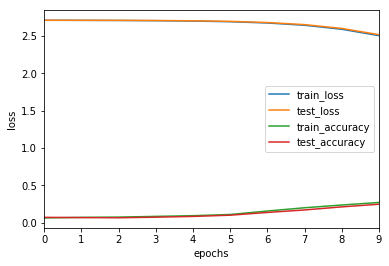

In [15]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

## 学習済みモデルの出力

In [8]:
with open("katakana_model.pickle", "wb") as f:
    pickle.dump(tnet, f)